In [5]:
import numpy as np
from numpy import ma
import pandas as pd
from scipy.stats import norm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt



np.set_printoptions(precision=5, suppress=True)

# Set random seed to student number
np.random.seed(46387334) # TODO: UNCOMMENT

In [6]:
# Helper functions
def sig_fig(X, sigfigs):
    exp = np.floor(ma.log10(abs(X)).filled(0))
    return np.round(X*10**-exp, sigfigs-1) * 10**exp

def get_diff(a1, a2):
    print(f"{a1.shape=}")
    print(f"{a2.shape=}")

    rows, cols = a1.shape
    for i in range(rows):
        for j in range(cols):
            print(f"[{i},{j}]: {round(a1[i, j], 3) :>5} vs {round(a2[i, j], 3) :>7}  |  Error: {(a1[i, j] - a2[i, j]) * (100 / a1[i, j])  :.2f}%")

## 1.d)

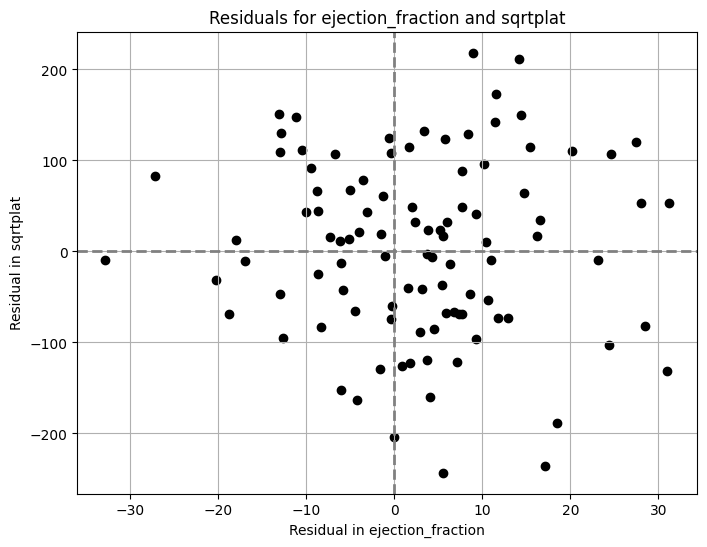

Fitted Mean: [2.84047 3.37869]
Fitted Covariance Matrix: 
[[ 150.83913  -38.34615]
 [ -38.34615 9725.27309]]


In [16]:
# Load the CSV file
df = pd.read_csv('question_1_a_obs.csv')

# Extract relevant variables (assuming the CSV has columns 'a' and 'b')
data = df[['ejection_fraction', 'sqrtplat']].values

# Mean vector for conditonal ultivariate normal distribution
mu_cond = np.array([
    [36.287 ],
    [503.27 ]
])

# Covariance matrix for conditonal multivariate normal distribution
sigma_cond = np.array([
    [133.52, 62.226],
    [62.226, 8708.6],
])

# Calculate residual vectors
residuals = data - mu_cond.reshape(2,)

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.grid()
plt.scatter(residuals[:, 0], residuals[:, 1], color='black', edgecolor='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=2)
plt.axvline(0, color='gray', linestyle='--', linewidth=2)
plt.title('Residuals for ejection_fraction and sqrtplat')
plt.xlabel('Residual in ejection_fraction (%)')
plt.ylabel('Residual in sqrtplat (sqrt(1000 platelets / mL))')
plt.show()

# Fit a multivariate normal distribution to the residuals
fitted_distribution = multivariate_normal(mean=np.mean(residuals, axis=0), cov=np.cov(residuals, rowvar=False))

# Parameter estimates (mean and covariance)
fitted_mean = fitted_distribution.mean
fitted_covariance = fitted_distribution.cov

# Report the parameter estimates
print(f"Fitted Mean: {fitted_mean}")
print(f"Fitted Covariance Matrix: \n{fitted_covariance}")


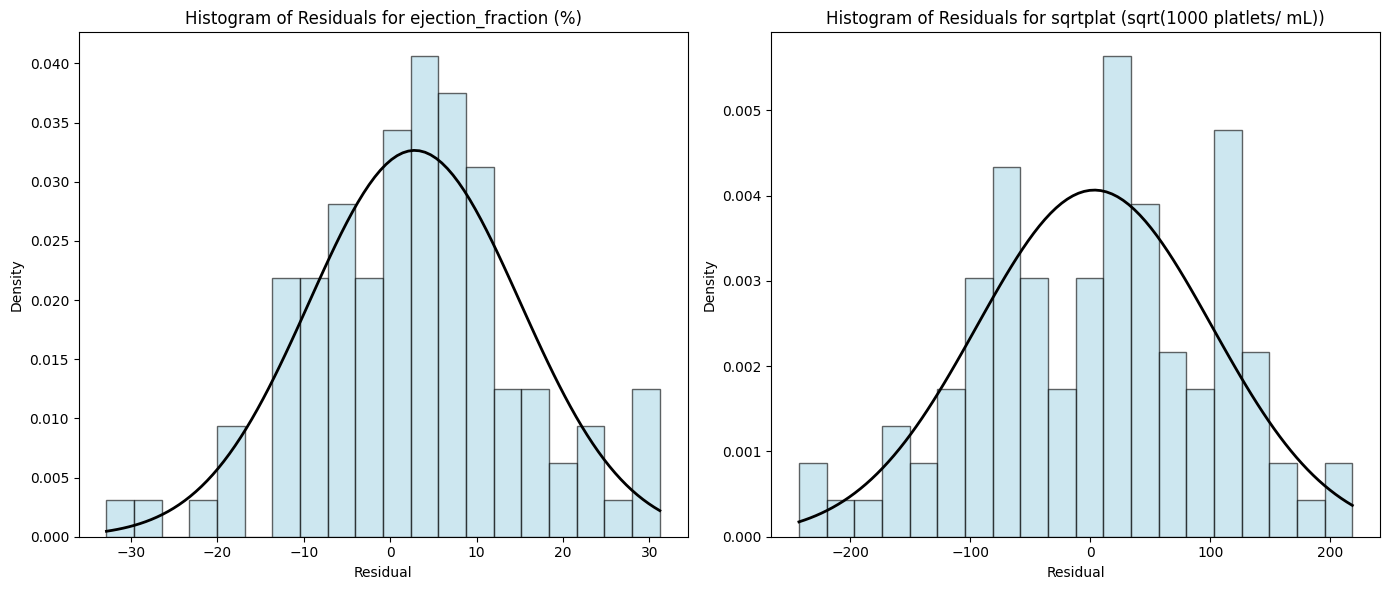

In [18]:
# Plotting histograms with fitted normal distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Labels for the variables
labels = ['ejection_fraction (%)', 'sqrtplat (sqrt(1000 platelets / mL))']

for i in range(2):
    # Fit a normal distribution to the residuals of each variable
    mean, std_dev = norm.fit(residuals[:, i])
    
    # Plot the histogram
    axes[i].hist(residuals[:, i], bins=20, density=True, alpha=0.6, color='lightblue', edgecolor='k')
    
    # Plot the fitted normal distribution curve
    x = np.linspace(residuals[:, i].min(), residuals[:, i].max(), 100)
    p = norm.pdf(x, mean, std_dev)
    axes[i].plot(x, p, 'k', linewidth=2)
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Residuals for {labels[i]}')
    axes[i].set_xlabel('Residual')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()